In [13]:
#Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Importing data
data=pd.read_csv('D:/DAta science/Projects_self/NLP_PSWD/data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


##### DATA PREPROCESSING

In [15]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [16]:
#Checking for nan value

data.isna().sum()

password    1
strength    0
dtype: int64

In [18]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [19]:
#Dropping nan values
data.dropna(inplace=True) #inplace updates the dataset

In [21]:
#Crosscheck nan values
data.isnull().sum()

password    0
strength    0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

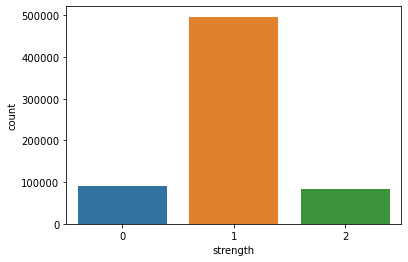

In [22]:
sns.countplot(data['strength'])

There is a huge fluctuation in data, machine learning model will be biased due to imbalanced dataset

In [23]:
#Seperating/extracting dependent(strength) and independent variables(password)
#Converting data into array
password_tuple=np.array(data)

In [24]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [26]:
#Shuffling the array to increase the roboustness
import random
random.shuffle(password_tuple)

In [27]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]

In [28]:
x

['kzde5577',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'megzy123',
 'visi7k1yr',
 'kzde5577',
 'kzde5577',
 'megzy123',
 'megzy123',
 'kzde5577',
 'kino3434',
 'lamborghin1',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'kino3434',
 'kzde5577',
 'megzy123',
 'u6c8vhow',
 '6975038lp',
 'jerusalem393',
 'megzy123',
 'lamborghin1',
 'megzy123',
 'g067057895',
 '612035180tok',
 '612035180tok',
 'lamborghin1',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 '6975038lp',
 'visi7k1yr',
 'kzde5577',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'kzde5577',
 'as326159',
 '612035180tok',
 'as326159',
 'visi7k1yr',
 'v1118714',
 'visi7k1yr',
 'u6c8vhow',
 'elyass15@ajilent-ci',
 '612035180tok',
 'elyass15@ajilent-ci',
 'g067057895',
 'idofo673',
 'as326159',
 'u6c8vhow',
 'v1118714',
 'jerusalem393',
 'v1118714',
 'kzde5577',
 'lamborghin1',
 'jytifok873',
 'calcifer32',
 'u6c8vhow',
 'v1118714',
 'kzde5577',
 'as326159',
 'asgaliu11',
 'megzy123',
 'kswa2mrv',
 '612035180tok',
 '612035180tok',
 'asgaliu11',
 'kino3434',
 '0

In [29]:
#Performing TFIDF
#data should be characters to pass it through TFIDF

In [47]:
# #### create a custom function to split input into characters of list
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [31]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

####  import TF-IDF vectorizer to convert String data into numerical data

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

##### apply TF-IDF vectorizer on data
X=vectorizer.fit_transform(x)

In [38]:
X.shape

(669639, 115)

In [40]:
vectorizer.get_feature_names()

['\x05',
 '\x08',
 '\x10',
 '\x19',
 '\x1b',
 '\x1c',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\xa0',
 '¡',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'è',
 'ê',
 'í',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 '÷',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '‚']

In [41]:
first_document_vector=X[0]
first_document_vector

<1x115 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [42]:
#Transposing
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.5673535 ],
        [0.        ],
        [0.59157179],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [51]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591572
5,0.567353
z,0.335725
k,0.291571
d,0.285641
...,...
@,0.000000
?,0.000000
>,0.000000
=,0.000000


##### Applyting ML algorithm on the data
#split data into train & test

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
X_train.shape

(535711, 115)

In [56]:
from sklearn.linear_model import LogisticRegression

#### # Apply Logistic on data as use-cas is Classification

In [58]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [59]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [60]:
#Prediction data
#### doing prediction for specific custom data

In [61]:
dt=np.array(['%@123abdc'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

In [63]:
# doing prediction on X-Test data
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [66]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 5166 12710    15]
 [ 3621 93311  2492]
 [   25  5124 11464]]


In [67]:
print(accuracy_score(y_test,y_pred))

0.8208963024908906


#### create report of your model

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39     17891
           1       0.84      0.94      0.89     99424
           2       0.82      0.69      0.75     16613

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

